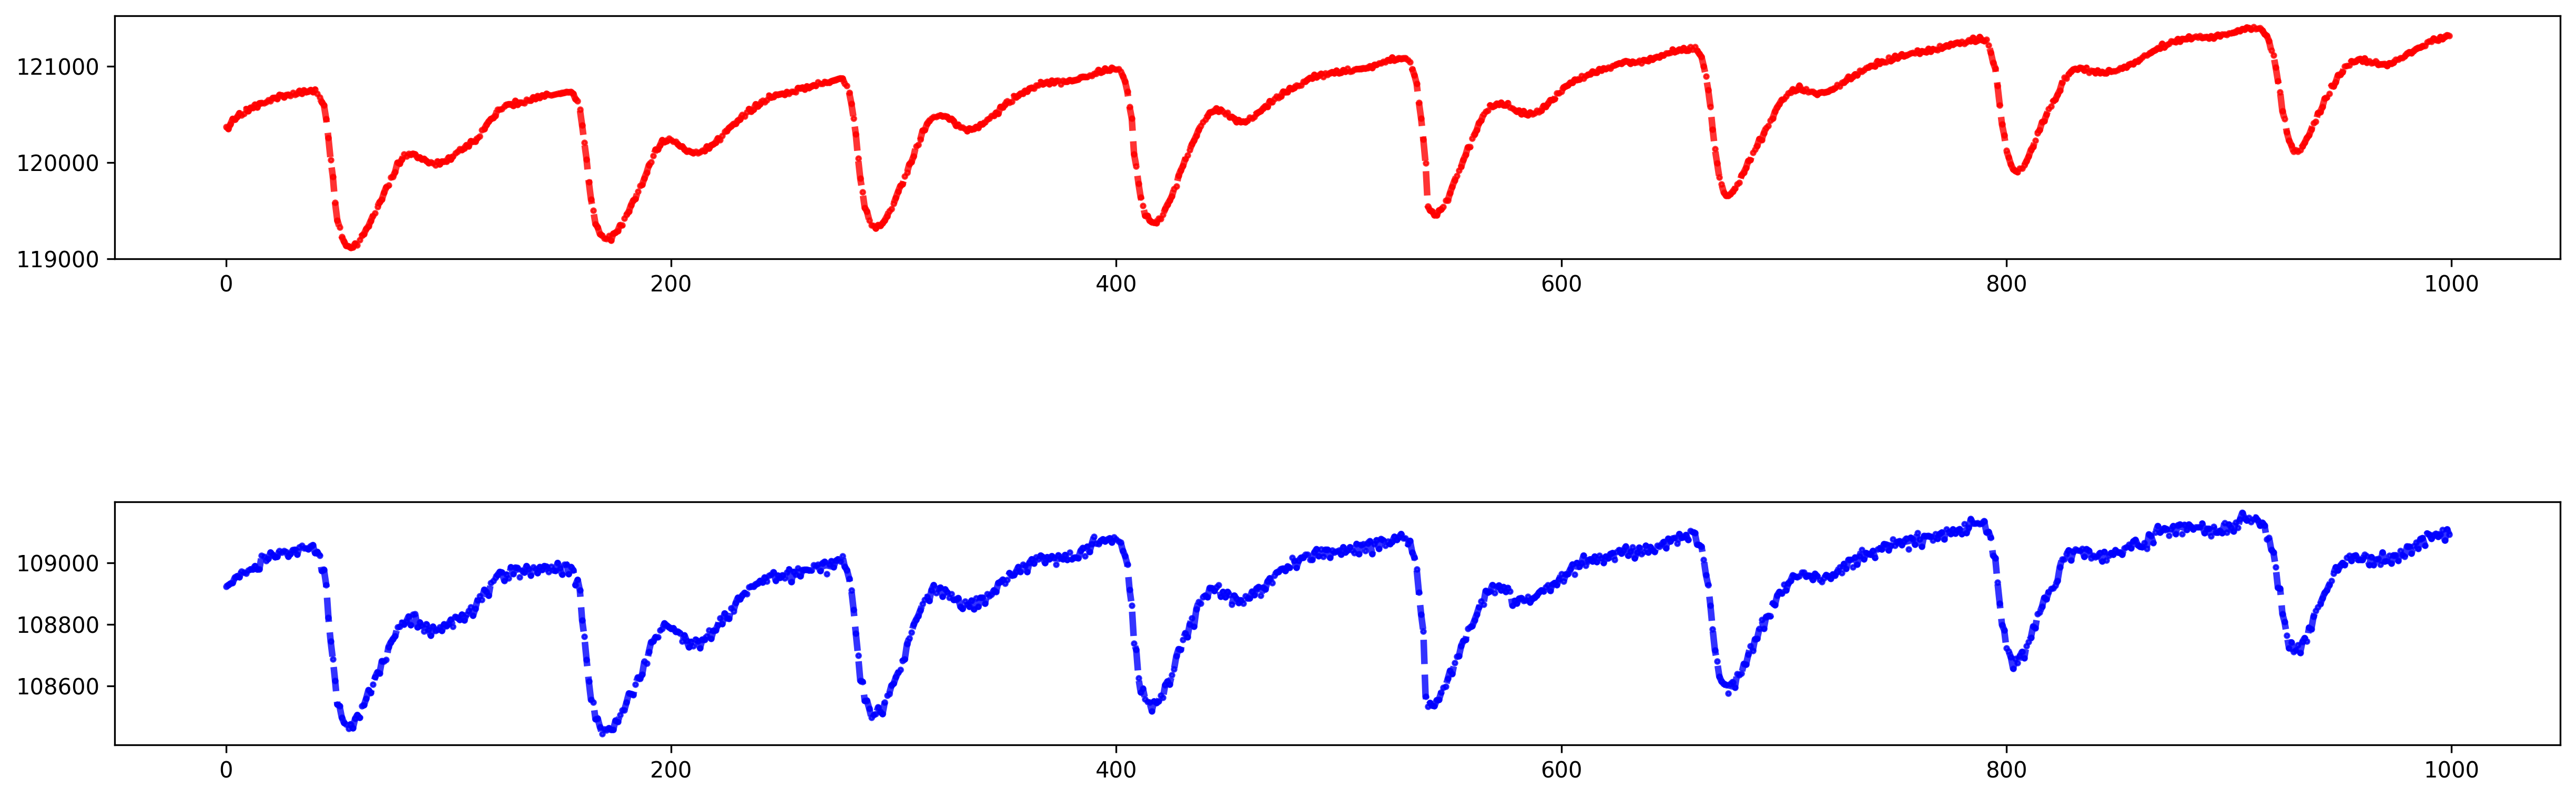

In [1]:
# open file
import os

dir_name = %pwd

# import libs
import matplotlib
import os.path
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker
from matplotlib import rcParams
from matplotlib import rc
import matplotlib.gridspec as gridspec

# rc('font',**{'family':'sans-serif','sans-serif':['PT Sans'],'size': 35})
# colors = ['#4E79A7', '#F28E2B', '#E15759', '#59A14E', '#EDC949', '#AF7AA1', '#FF9DA7', '#9C755F', '#BAB0AC', '#76B7B2']
from smooth_demo import smooth # smoothing function pulling from .\smooth_demp.py

# open file 
from tkinter import filedialog
from tkinter import *

root = Tk()
fname1 = filedialog.askopenfilename(initialdir = dir_name,title = "Select file")
fname1_blank1 = os.path.basename(fname1)
fname1_blank1 = str(fname1).replace(".csv", "")
root.destroy() # get rid of the top-level instance once to make it actually invisible

# Load data
data_array = np.genfromtxt(fname1, delimiter=',', skip_footer=0, skip_header=0)
data = [data_array[:, 0], data_array[:, 1]]

# figure
fig, axs = plt.subplots(2, 1, figsize=(20,3*2),dpi=300, facecolor='w', edgecolor='w',gridspec_kw={'hspace': 1, 'wspace': 0.5})
# plot
axs[0].plot(data[0], linewidth=3, color='red', alpha = 0.8, linestyle='--', marker="o",markersize=2, label = "RAW PPG (Red)")
axs[1].plot(data[1], linewidth=3, color='blue', alpha = 0.8, linestyle='--', marker="o",markersize=2, label = "RAW PPG (IR)")

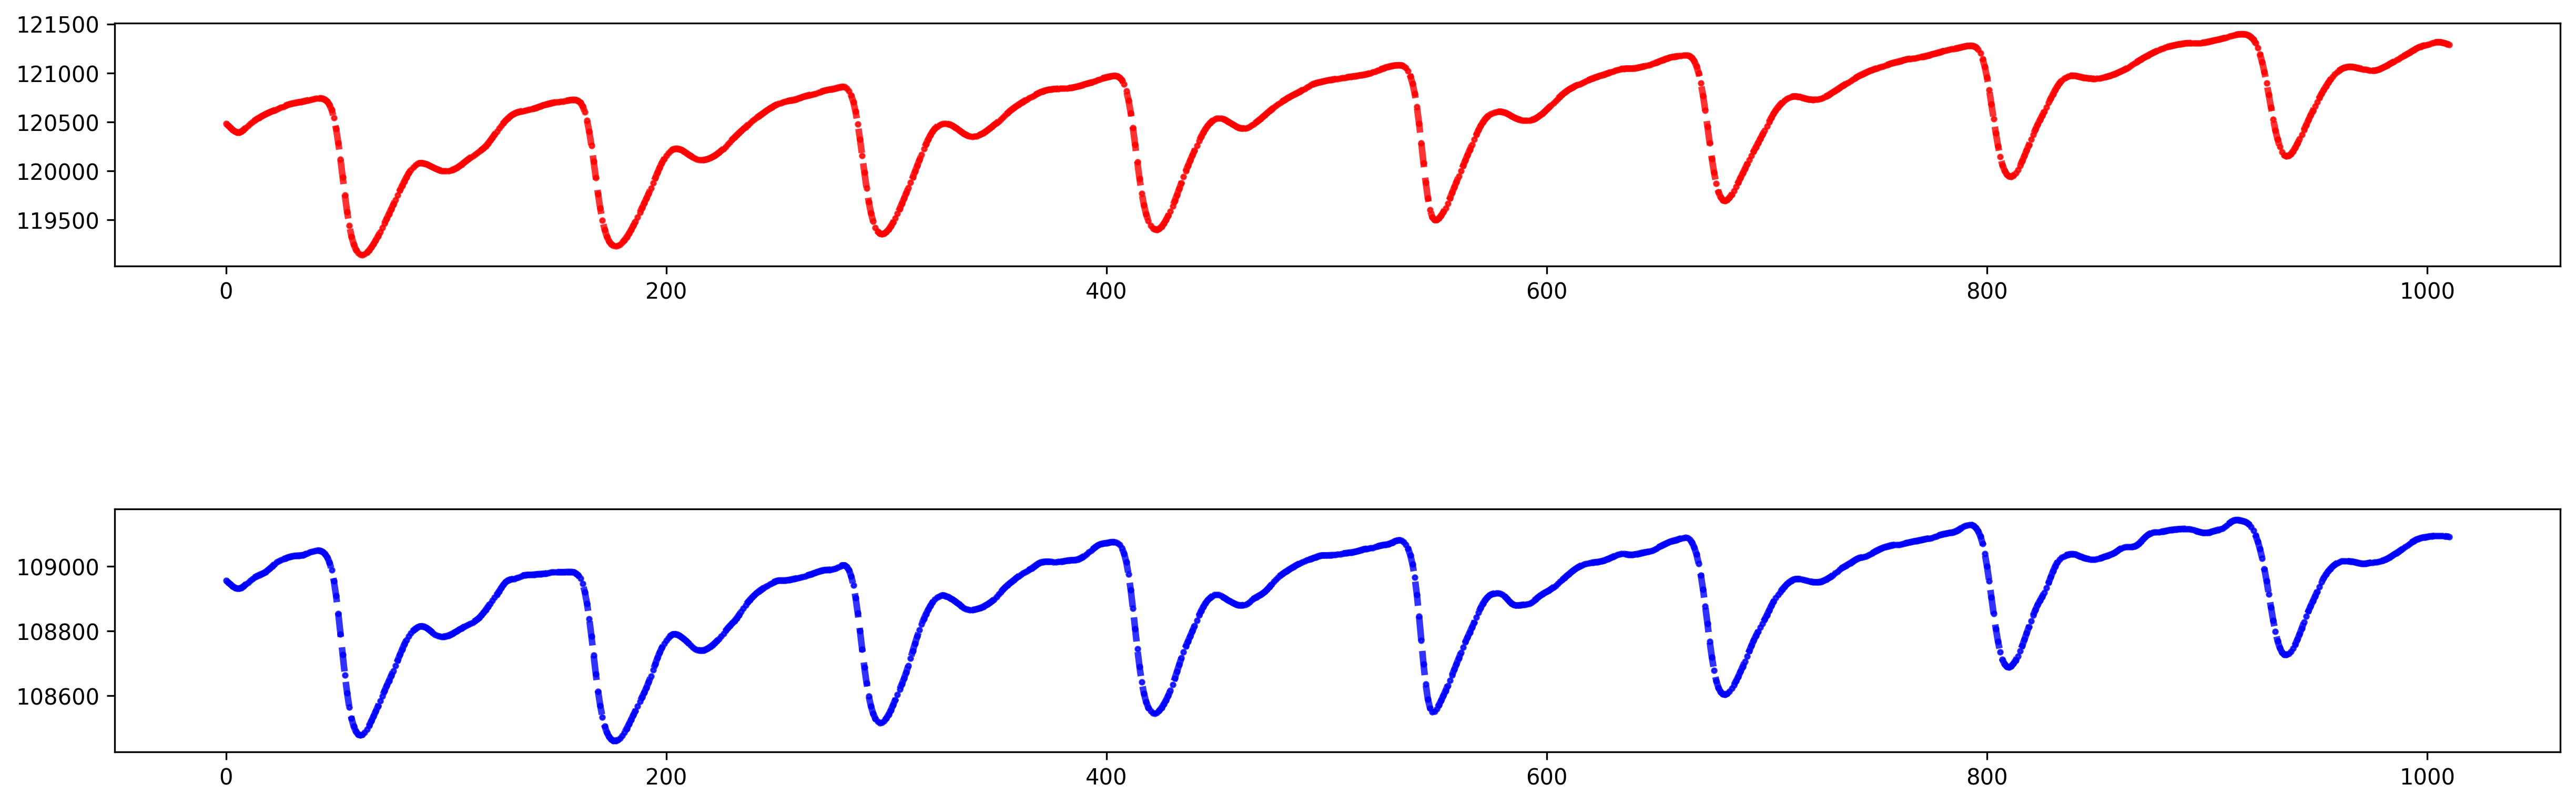

In [2]:
# Smoothening the raw signal
smoothing = 12
red_data = smooth(data[0], smoothing)
ir_data = smooth(data[1], smoothing)

# figure
fig, axs = plt.subplots(2, 1, figsize=(20,3*2),dpi=300, facecolor='w', edgecolor='w',gridspec_kw={'hspace': 1, 'wspace': 0.5})
# plot
axs[0].plot(red_data, linewidth=3, color='red', alpha = 0.8, linestyle='--', marker="o",markersize=2, label = "Smooth PPG (Red)")
axs[1].plot(ir_data, linewidth=3, color='blue', alpha = 0.8, linestyle='--', marker="o",markersize=2, label = "Smooth PPG (IR)")

In [3]:
#Peak detection

from peakdetect import peakdet
red_maxtab, red_mintab = peakdet(red_data,(max(red_data)-min(red_data))/17) # red_maxtab[:,0] given indexes of the peak and red_maxtab[:,1] give the values
ir_maxtab, ir_mintab = peakdet(ir_data,(max(ir_data)-min(ir_data))/17) # ir_maxtab[:,0] given indexes of the peak and ir_maxtab[:,1] give the values


# figure
fig, axs = plt.subplots(2, 1, figsize=(20,3*2),dpi=300, facecolor='w', edgecolor='w',gridspec_kw={'hspace': 1, 'wspace': 0.5})
# red plot
axs[0].plot(red_data, linewidth=3, color='black', alpha = 0.8, linestyle='--', marker="o",markersize=2, label = "PPG (Red)")
axs[0].plot(red_mintab[1:-1,0], red_mintab[1:-1,1],'ro',linewidth=3)
axs[0].plot(red_maxtab[1:-1,0], red_maxtab[1:-1,1],'bo',linewidth=3)

# ir plot
axs[1].plot(ir_data, linewidth=3, color='black', alpha = 0.8, linestyle='--', marker="o",markersize=2, label = "PPG (IR)")
axs[1].plot(ir_mintab[1:-1,0], ir_mintab[1:-1,1],'ro',linewidth=3)
axs[1].plot(ir_maxtab[1:-1,0], ir_maxtab[1:-1,1],'bo',linewidth=3)



ImportError: cannot import name 'NaN' from 'numpy' (C:\Users\tasif\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\numpy\__init__.py)

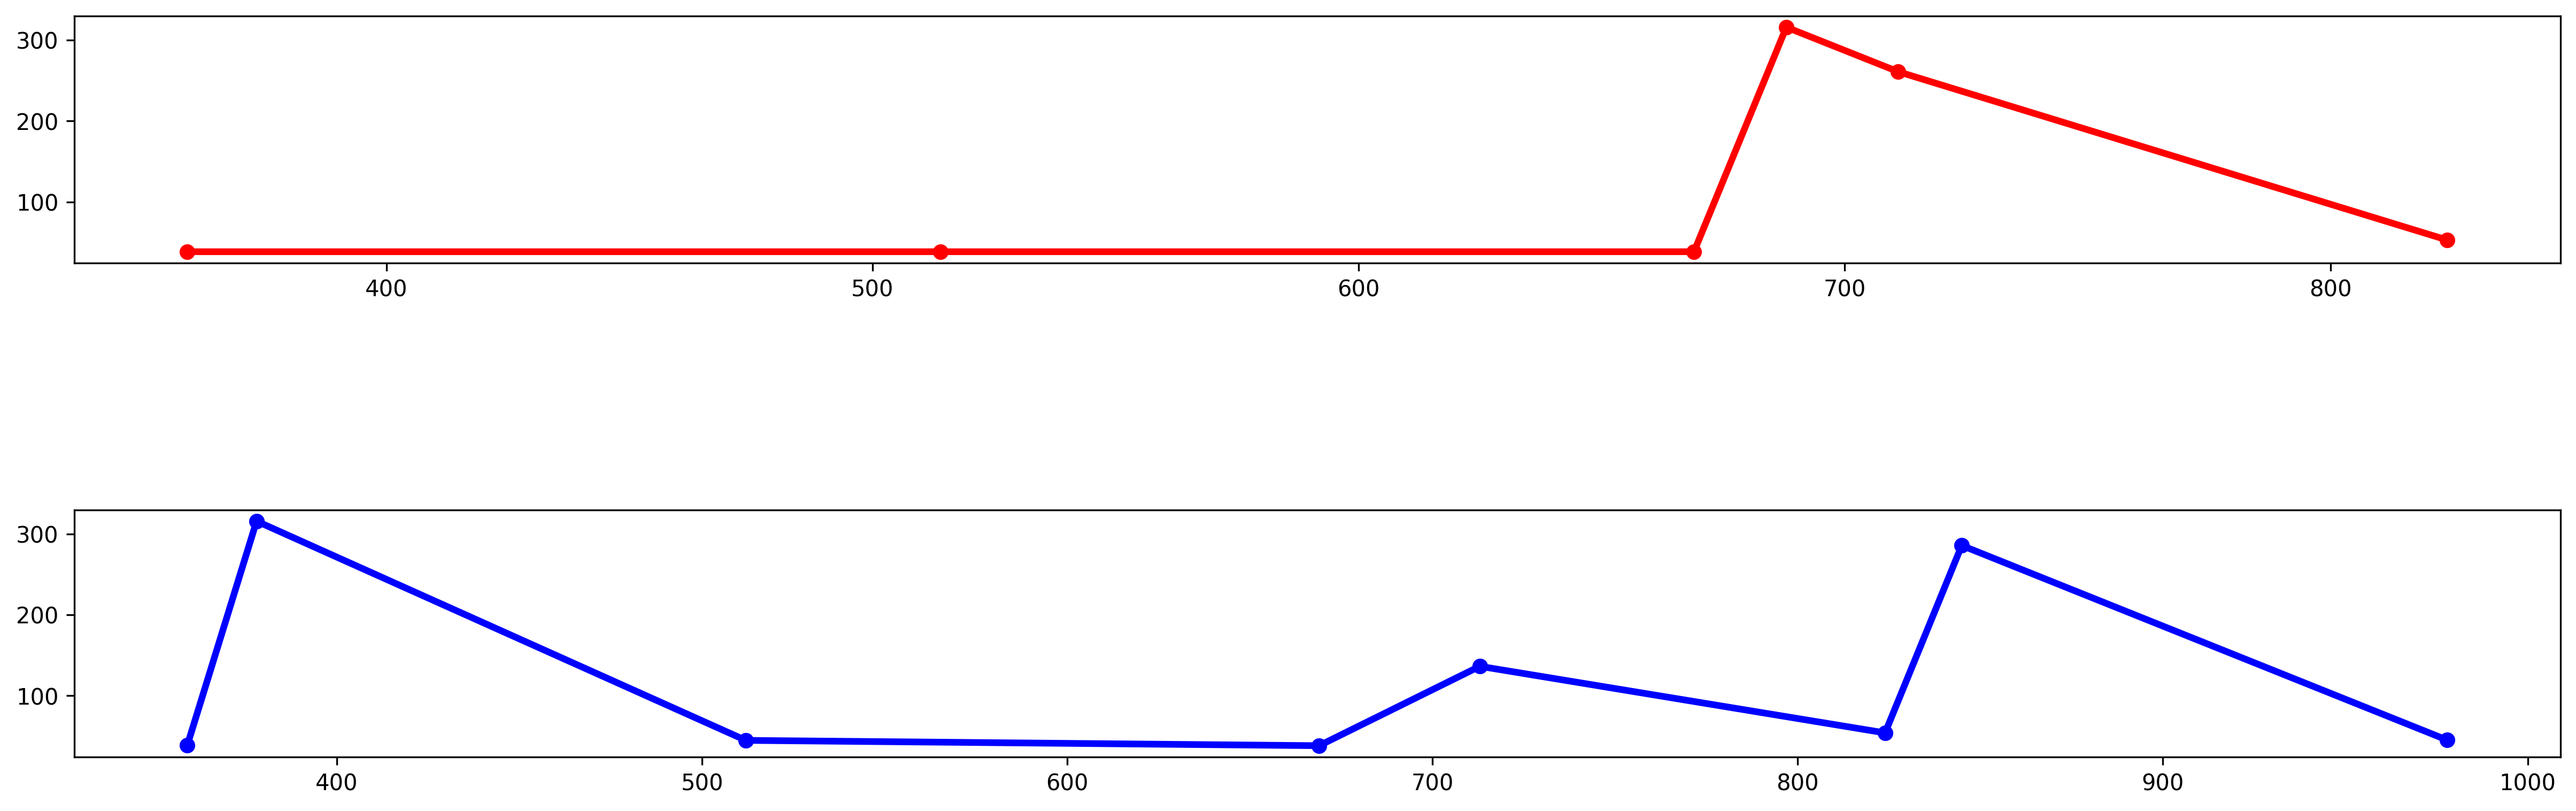

In [9]:
# Heart rate

# From red signal
red_time_diff = np.diff(red_maxtab[1:-1,0])
red_heart_rate_bpm = 60.0/(red_time_diff/100.0)

# From IR signal
ir_time_diff = np.diff(ir_maxtab[1:-1,0])
ir_heart_rate_bpm = 60.0/(ir_time_diff/100.0)

# figure
fig, axs = plt.subplots(2, 1, figsize=(20,3*2),dpi=300, facecolor='w', edgecolor='w',gridspec_kw={'hspace': 1, 'wspace': 0.5})
# red plot
axs[0].plot(red_maxtab[2:-1,0], red_heart_rate_bpm,'o-',linewidth=3, color='red')

# ir plot
axs[1].plot(ir_maxtab[2:-1,0], ir_heart_rate_bpm,'o-',linewidth=3, color= 'blue')